# **Let's Grow More - Data Science Internship**

**Task-4 : Exploratory Data Analysis on Dataset - Terrorism**

---
**Description**:

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice; 

(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

**Dataset-Link:**
https://bit.ly/2TK5Xn5

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('globalterrorismdb_07181dist.csv', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
print(df.head(),'\n',df.tail())

        eventid  iyear  imonth  iday  ... INT_MISC  INT_ANY related  casualties
0  1.970000e+11   1970       7     2  ...      0.0      0.0     NaN         1.0
1  1.970000e+11   1970       0     0  ...      1.0      1.0     NaN         0.0
2  1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         1.0
3  1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         0.0
4  1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         0.0

[5 rows x 136 columns] 
             eventid  iyear  imonth  iday  ... INT_MISC  INT_ANY related  casualties
48700  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         8.0
48701  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         9.0
48702  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         3.0
48703  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         4.0
48704  1.990000e+11   1991      10    22  ...      NaN      NaN     NaN   

**Shape of our Dataset**

*This shows hom many rows & columns are there in dataset*




In [86]:
df.shape

(48705, 135)

**Names of our 135 columns**


In [87]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

**Unique elements in our dataset**

In [88]:
df.nunique()

eventid          3
iyear           22
imonth          13
iday            32
approxdate      24
              ... 
INT_LOG          3
INT_IDEO         3
INT_MISC         3
INT_ANY          3
related       3537
Length: 135, dtype: int64

**Null Values in our Dataset**

In [89]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    48679
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       43906
Length: 135, dtype: int64

**Info of our Dataset**

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48705 entries, 0 to 48704
Columns: 135 entries, eventid to related
dtypes: float64(61), int64(17), object(57)
memory usage: 50.2+ MB


**Describing our Dataset**

In [91]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,4.870500e+04,48705.000000,48705.000000,48705.000000,48705.000000,48705.000000,48705.000000,46060.000000,4.606000e+04,48705.000000,48705.000000,48705.000000,48705.000000,48705.000000,48705.000000,8104.000000,48705.000000,48705.000000,48705.000000,48705.000000,41.000000,2.000000,48705.000000,46569.000000,48487.000000,543.000000,407.000000,491.000000,82.000000,61.000000,80.00000,0.0,48704.000000,118.000000,11.000000,48704.000000,7119.000000,1236.000000,1240.000000,316.000000,19.000000,18.000000,8.0,8.000000,49.000000,48704.000000,41418.000000,2814.000000,2344.000000,364.000000,315.000000,66.000000,62.000000,42928.000000,2860.000000,2826.000000,41106.000000,2815.000000,2537.000000,48704.000000,16501.000000,9.417000e+03,48529.000000,3008.000000,3008.000000,958.000000,713.000000,48347.000000,5.390000e+02,1.0,1.190000e+02,2.0,1180.000000,894.000000,48704.000000,48704.000000,48704.000000,48704.000000
mean,1.984494e+11,1983.980392,6.357643,15.330418,0.016898,152.243117,5.272806,16.800310,-1.894181e+03,1.416857,0.032399,0.991664,0.992157,0.852767,-1.310872,1.158810,0.098553,0.920665,0.000842,2.994539,4.585366,3.000000,7.662807,44.669201,129.397777,8.893186,46.550369,170.765784,7.195122,45.918033,143.08750,NaN,0.047553,0.177966,0.090909,0.001191,6.086669,-73.143204,-0.023387,4.474684,0.947368,5.611111,1.0,8.000000,0.183673,6.390543,10.060505,6.417555,9.888652,6.615385,9.930159,6.287879,10.467742,2.073449,0.301399,0.527601,1.675254,0.598224,0.061096,0.723719,3.396461,2.345680e+05,0.061984,1.066157,0.076795,17.112735,31.281907,0.011335,3.365172e+06,20000.0,1.063936e+06,0.0,3.017797,8.675615,-3.141015,-3.095783,0.151179,-2.414832
std,6.001062e+08,5.210674,3.347402,8.828112,0.128889,137.745203,3.159752,25.157890,4.015819e+05,1.098503,0.177060,0.090921,0.088214,0.354342,3.426773,0.469561,0.298063,0.270263,0.029002,1.842243,2.469571,1.414214,6.791713,33.169091,73.148083,6.802133,29.951304,114.218034,6.045995,29.478973,82.33894,NaN,0.212820,0.384115,0.301511,0.034489,73.324962,44.058111,1.654188,3.156650,0.229416,3.821593,0.0,2.828427,0.391230,2.188180,7.151448,1.795279,7.187149,2.132107,7.902363,1.516729,7.787585,8.546027,5.812934,2.792300,10.020674,14.396811,0.351613,0.617294,0.517825,5.953699e+06,0.241128,394.926217,3.813636,128.356700,150.008822,0.105861,4.346548e+07,NaN,4.209263e+06,0.0,1.352479,32.732277,4.361325,4.414419,0.709547,4.304024
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,7.000000,6.00000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.980000e+11,1980.000000,4.000000,8.000000,0.000000,61.000000,3.000000,4.438910,-7.697846e+01,1.000000,0.000000,1.000000,1.000000,1.0000

**Now we will build a casualties column containing killed & wounded people**

In [92]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

df['casualties'] = df['nkill'] + df['nwound']

**Now let's visualize the terrorism data**

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

**Graph of Terrorist Attacks from year 1970 to1991**

In [94]:
year = df['iyear'].unique()
years_count = df['iyear'].value_counts(dropna=False).sort_index()

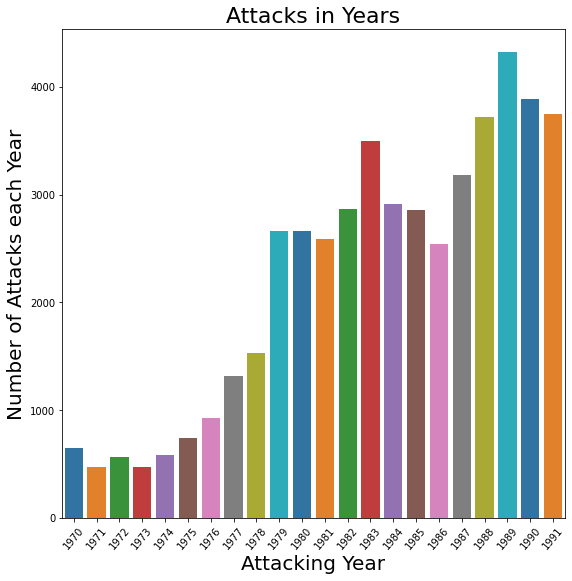

In [95]:
plt.figure(figsize=(9,9))
sns.barplot(x=year,y=years_count, palette='tab10')
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of Attacks each Year', fontsize=20)
plt.title('Attacks in Years', fontsize=22)
plt.show()

**These Graph shows the number of people killed in Terrorist Attacks**

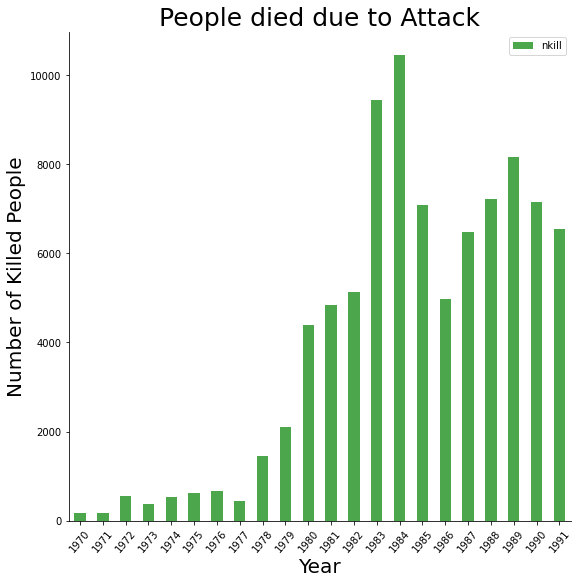

In [96]:
Df = df[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(9,9))
Df.plot(kind='bar', alpha=0.7, ax=ax4, color='green')
plt.xticks(rotation = 50)
plt.title('People died due to Attack', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Killed People', fontsize=20)

top_side = ax4.spines['top']
top_side.set_visible(False)
right_side = ax4.spines['right']
right_side.set_visible(False)

**These Graph shows the number of Active Terrorist Groups**

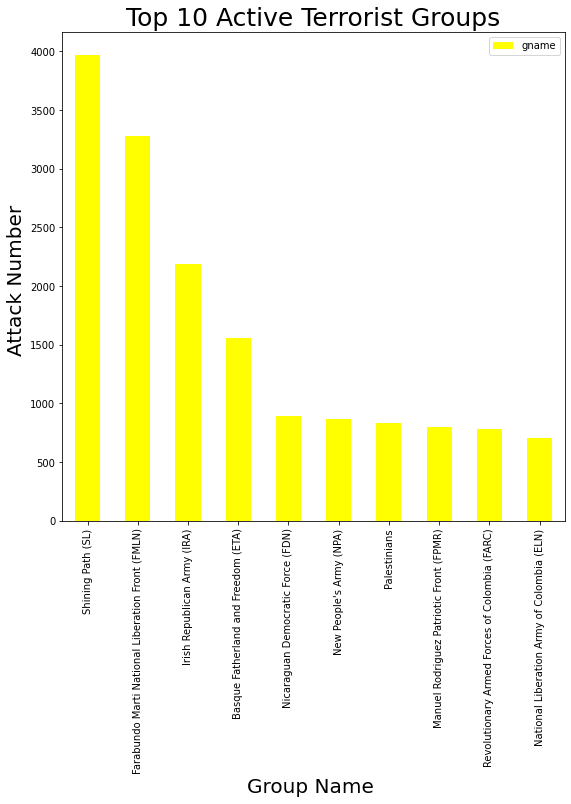

In [97]:
df['gname'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='yellow',figsize=(9,9))
plt.title('Top 10 Active Terrorist Groups', fontsize=25)
plt.xlabel('Group Name ',fontsize=20)
plt.ylabel('Attack Number ',fontsize=20)
plt.show()

**Graph of Top 10 Attacked Companies**

Text(0.5, 1.0, 'Name of Attack Type')

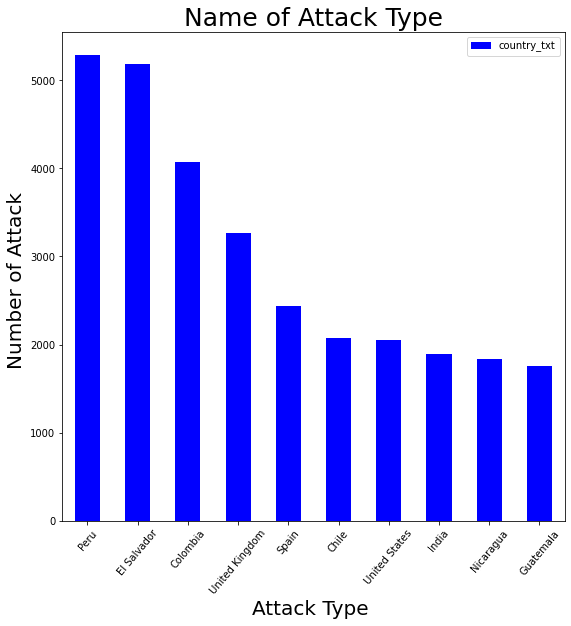

In [98]:
df['country_txt'].value_counts().to_frame().sort_values('country_txt',
  axis=0,ascending=False).head(10).plot(kind='bar',color='blue',figsize=(9,9))
plt.xticks(rotation=50)
plt.xlabel('Attack Type ',fontsize=20)
plt.ylabel('Number of Attack ',fontsize=20)
plt.title('Name of Attack Type', fontsize=25)

**Graph for types of attacks used by Terrorists**

Text(0.5, 1.0, 'Name of Attack Type')

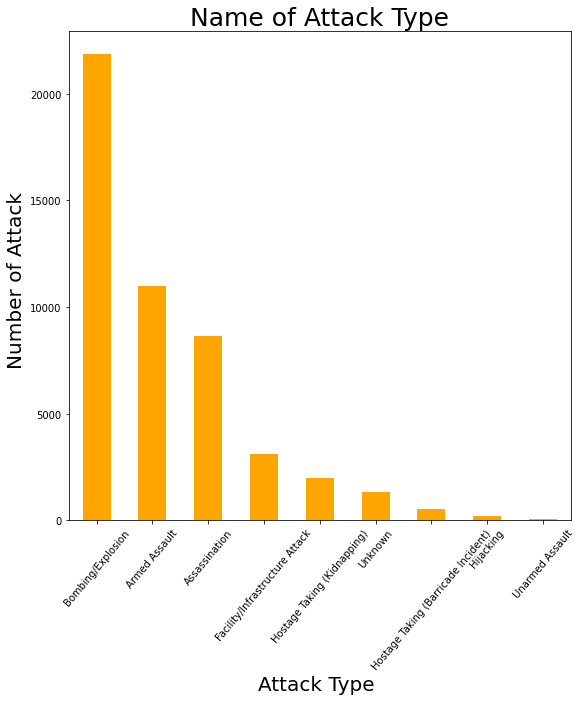

In [99]:
df['attacktype1_txt'].value_counts().plot(kind='bar',
   figsize=(9,9), color='orange')
plt.xticks(rotation=50)
plt.xlabel('Attack Type ',fontsize=20)
plt.ylabel('Number of Attack ',fontsize=20)
plt.title('Name of Attack Type', fontsize=25)

**Graph to show which sectors are most affected by Terrorist Attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Types of Attack')

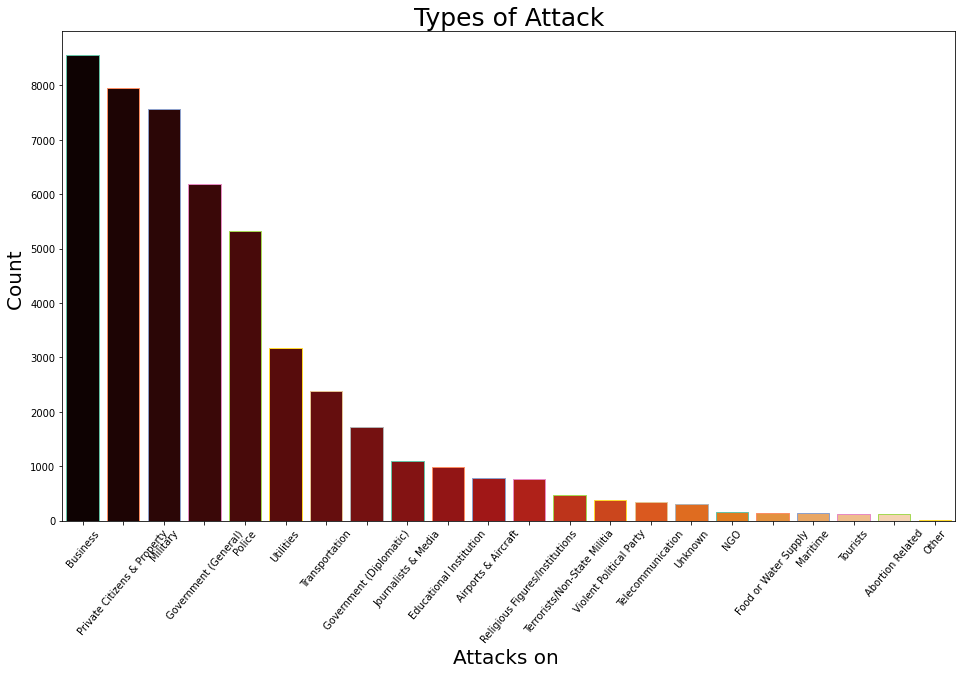

In [107]:
plt.subplots(figsize=(16,9))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,
    palette='gist_heat',edgecolor=sns.color_palette('Set2'))
plt.xticks(rotation=50)
plt.xlabel('Attacks on ',fontsize=20)
plt.ylabel('Count ',fontsize=20)
plt.title('Types of Attack', fontsize=25)

**Total Number of People killed in Terrorist Attacks**

In [101]:
kill = df.loc[:, 'nkill']
print('Total Number of People killed in Terrorist Attacks: ', int(sum(kill.dropna())))

Total Number of People killed in Terrorist Attacks:  89009


**Different types of Terrorist Attacks**

In [102]:
df1 = df.pivot_table(columns='attacktype1_txt', values='nkill',aggfunc='sum')
print(df)

            eventid  iyear  imonth  iday  ... INT_MISC  INT_ANY related  casualties
0      1.970000e+11   1970       7     2  ...      0.0      0.0     NaN         1.0
1      1.970000e+11   1970       0     0  ...      1.0      1.0     NaN         0.0
2      1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         1.0
3      1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         0.0
4      1.970000e+11   1970       1     0  ...      1.0      1.0     NaN         0.0
...             ...    ...     ...   ...  ...      ...      ...     ...         ...
48700  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         8.0
48701  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         9.0
48702  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         3.0
48703  1.990000e+11   1991      10    22  ...      0.0      0.0     NaN         4.0
48704  1.990000e+11   1991      10    22  ...      NaN      NaN     NaN     

**People Killed based on countries**

In [103]:
df2 = df.pivot_table(columns='country', values='nkill', aggfunc='sum')
print(df2)

country    4    5     6    7       8    ...  499  532     603   604   605
nkill    237.0  0.0  23.0  0.0  1060.0  ...  2.0  0.0  2986.0  34.0  15.0

[1 rows x 158 columns]


**Top 10 terrorist groups**

In [104]:
df.gname.value_counts()[1:11]

Shining Path (SL)                                   3969
Farabundo Marti National Liberation Front (FMLN)    3276
Irish Republican Army (IRA)                         2187
Basque Fatherland and Freedom (ETA)                 1553
Nicaraguan Democratic Force (FDN)                    895
New People's Army (NPA)                              870
Palestinians                                         836
Manuel Rodriguez Patriotic Front (FPMR)              799
Revolutionary Armed Forces of Colombia (FARC)        780
National Liberation Army of Colombia (ELN)           704
Name: gname, dtype: int64

# **Result:**
---
Highest Number of Attacks took place between **1983** & **1989** with over ***4000*** attacks.

***Shining Path(SL)*** is the most active terrorist group.
***Farabundo Marti National Liberation Front (FMLN)*** is yet another active group which is mostly active with ***(SL)***.

Highest number of Terrorist attacks took place in ***Peru*** with ***El Salvador*** in the second place.

Most frequent attack types were ***Bombing/Explosion*** & ***Armed Assault***.

Most affected areas by Terrorist Attacks are ***Buisness*** & ***Private Citizens & Military & Government***
